In [ ]:
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Load the Credit Card Fraud Detection Dataset
url = 'https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv'
data = pd.read_csv(url)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
features = data.iloc[:, 1:29].values
features.shape

(284807, 28)

In [ ]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

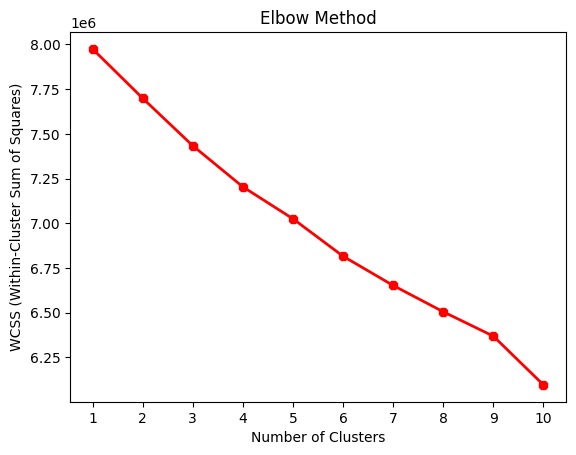

In [ ]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker ="8")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
wcss

[7974595.999999942,
 7698882.136703702,
 7433377.305935597,
 7203503.230834071,
 7024942.119796511,
 6815665.577295515,
 6652138.311749526,
 6505017.644124422,
 6368709.813166983,
 6096176.323357238]

In [ ]:
# Based on the Elbow Method, let's choose the number of clusters as 2 (fraudulent vs. non-fraudulent)
num_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels to the dataset
data['Cluster'] = cluster_labels
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1


In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 0.71481132, -0.32749361, -0.30398845,  0.17914241, -0.22399813,
        -0.00397329, -0.25117248, -0.06508518,  0.17671405,  0.12260568,
         0.07908948,  0.10128277,  0.00906672,  0.04252775,  0.07701924,
         0.04985949, -0.02070297, -0.07618987, -0.09733436, -0.01777398,
        -0.03649364, -0.11243119, -0.03631199,  0.00373904,  0.27614705,
         0.02541535, -0.03594782,  0.02610728],
       [-0.66313477,  0.3038178 ,  0.28201192, -0.16619149,  0.20780442,
         0.00368605,  0.23301422,  0.06037991, -0.16393869, -0.11374203,
        -0.07337179, -0.09396064, -0.00841125, -0.03945325, -0.07145122,
        -0.04625495,  0.01920627,  0.0706818 ,  0.09029767,  0.01648903,
         0.03385537,  0.10430309,  0.03368686, -0.00346873, -0.25618328,
        -0.02357797,  0.03334901, -0.02421988]])

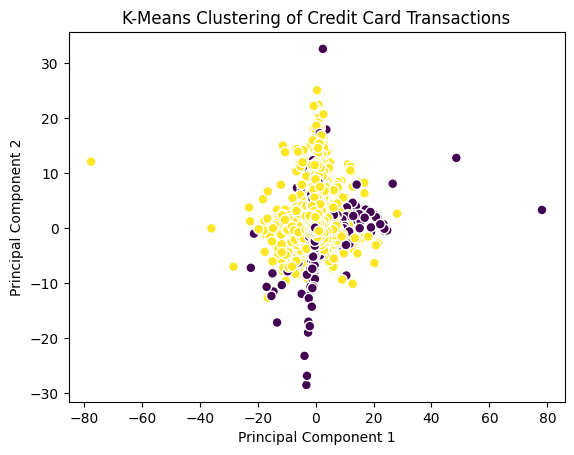

In [ ]:
# Visualize the clusters using PCA (you can choose other visualization techniques)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='w', s=50)
plt.title('K-Means Clustering of Credit Card Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()